In [1]:
import tweepy 
from textblob import TextBlob
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt 

In [2]:
config =pd.read_csv("./config.csv")

In [3]:
twitterApiKey="DhmqbegPXVBGp8ucsv7kOtOYU"
twitterApiSecret="xA020YA29bRFERarTwLZalvatJRxz3TnDBjZOW0yMntHdJaOkO"
twitterApiAccessToken="362986809-mAwprA0thb7K6tOKhG0NbnAUmxpNF4wfvXN8uPya"
twitterApiAccessTokenSecret="FttV2JF9gkID87TfKMILKFuCRoIJhNmX6OiiHCRiQV08n"

In [4]:
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi=tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
twitterAccount="OpenAI"

In [6]:
tweets=tweepy.Cursor(twitterApi.user_timeline,
                    screen_name=twitterAccount,
                    count=None,
                    since_id=None,
                    max_id=None,trim_user=True,exclude_replies=True,contribubtor_details=False,
                    include_entities=False).items(50);

In [7]:
df=pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])

Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities
Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities
Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities
Unexpected parameter: contribubtor_details
Unexpected parameter: include_entities


In [8]:
df.head()

,Tweet
0,"ChatGPT users can now turn off chat history, a..."
1,We're launching the OpenAI Bug Bounty Program ...
2,We’re sharing details on our approach to safet...
3,We took ChatGPT offline Monday to fix a bug in...
4,We are adding support for plugins to ChatGPT —...


In [9]:
def cleanUpTweet(txt):
    txt=re.sub(r'@[A-Za-z0-9_]+',"",txt)
    txt=re.sub(r'#','',txt)
    txt=re.sub(r'RT :','',txt)
    txt=re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    return txt

In [10]:
df['Tweet']=df['Tweet'].apply(cleanUpTweet)

In [11]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [12]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [13]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [14]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,"ChatGPT users can now turn off chat history, a...",0.000000,0.000000
1,We're launching the OpenAI Bug Bounty Program ...,0.550000,0.200000
2,We’re sharing details on our approach to safety,0.000000,0.000000
3,We took ChatGPT offline Monday to fix a bug in...,0.500000,0.000000
4,We are adding support for plugins to ChatGPT —...,0.000000,0.000000
5,Great news! ChatGPT Plus subscriptions are now...,0.476136,0.409091
6,"Announcing GPT-4, a large multimodal model, wi...",0.428571,0.214286
7,ChatGPT and Whisper are now available through ...,0.400000,0.400000
8,How we are planning for AGI:,0.000000,0.000000
9,"Information on ChatGPT’s alignment, plans to i...",0.288889,0.200000


In [15]:
df=df.drop(df[df['Tweet']==''].index)

In [16]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,"ChatGPT users can now turn off chat history, a...",0.000000,0.000000
1,We're launching the OpenAI Bug Bounty Program ...,0.550000,0.200000
2,We’re sharing details on our approach to safety,0.000000,0.000000
3,We took ChatGPT offline Monday to fix a bug in...,0.500000,0.000000
4,We are adding support for plugins to ChatGPT —...,0.000000,0.000000
5,Great news! ChatGPT Plus subscriptions are now...,0.476136,0.409091
6,"Announcing GPT-4, a large multimodal model, wi...",0.428571,0.214286
7,ChatGPT and Whisper are now available through ...,0.400000,0.400000
8,How we are planning for AGI:,0.000000,0.000000
9,"Information on ChatGPT’s alignment, plans to i...",0.288889,0.200000


In [17]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [18]:
df['Score']=df['Polarity'].apply(getTextAnalysis)

In [19]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,"ChatGPT users can now turn off chat history, a...",0.000000,0.000000,Neutral
1,We're launching the OpenAI Bug Bounty Program ...,0.550000,0.200000,Positive
2,We’re sharing details on our approach to safety,0.000000,0.000000,Neutral
3,We took ChatGPT offline Monday to fix a bug in...,0.500000,0.000000,Neutral
4,We are adding support for plugins to ChatGPT —...,0.000000,0.000000,Neutral
5,Great news! ChatGPT Plus subscriptions are now...,0.476136,0.409091,Positive
6,"Announcing GPT-4, a large multimodal model, wi...",0.428571,0.214286,Positive
7,ChatGPT and Whisper are now available through ...,0.400000,0.400000,Positive
8,How we are planning for AGI:,0.000000,0.000000,Neutral
9,"Information on ChatGPT’s alignment, plans to i...",0.288889,0.200000,Positive


In [20]:
positive=df[df['Score']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of positive tweets")
pos=positive.shape[0]/df.shape[0]*100

57.99999999999999% of positive tweets


In [21]:
negative=df[df['Score']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of negative tweets")
neg=negative.shape[0]/df.shape[0]*100

4.0% of negative tweets


In [22]:
neutral=df[df['Score']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of neutral tweets")
neutrall=neutral.shape[0]/df.shape[0]*100

38.0% of neutral tweets


In [23]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neutrall]
colors=['yellowgreen','lightcoral','gold']

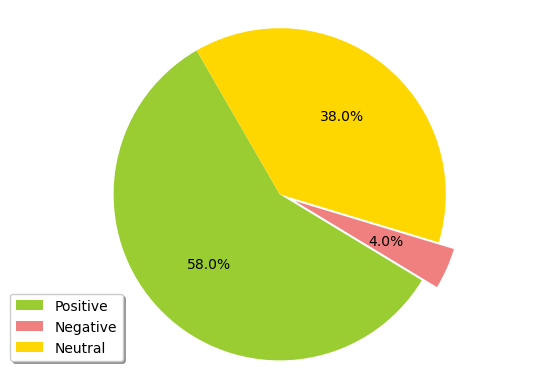

In [24]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_AnalysisChatGPT.png")

<BarContainer object of 3 artists>

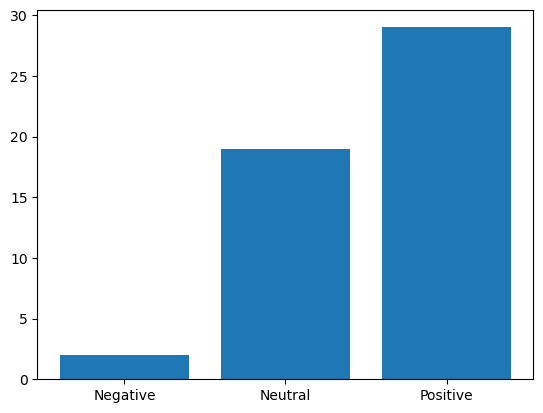

In [25]:
labels=df.groupby('Score').count().index.values
values=df.groupby('Score').size().values
plt.bar(labels,values)

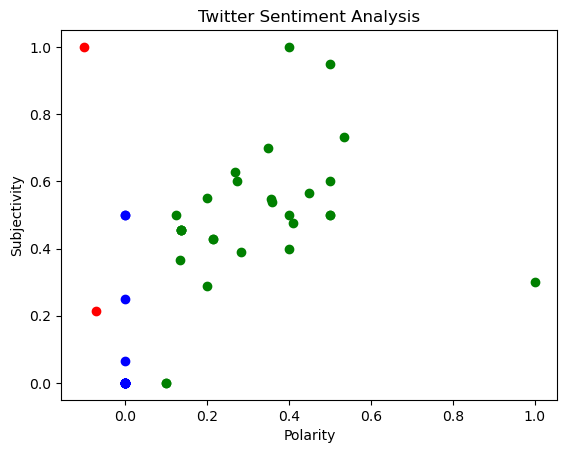

In [26]:
for index,row in df.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
        
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()